In [1]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
#importing dataset
adult_df = pd.read_csv(r'DataSets\adult_data.csv',
                       header=None,delimiter=' *, *',engine='python')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#assigning column names 
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head()



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#shape of dataset
adult_df.shape

(32561, 15)

# Pre processing the data

In [5]:
#create a copy of the dataframe
adult_df_rev = pd.DataFrame.copy(adult_df)

In [6]:
# droping of logically irrelavant(fnlwgt) 
#and reductant variable(education)
adult_df_rev=adult_df_rev.drop(["education","fnlwgt"],axis=1) 

In [7]:
#checking the null values
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
"""since there is already mention in dataset description that data contain missing values as '?'
   if there more than one form of missing values paass the list of that values
   like replace(['?','$','@'],np.nan)"""
adult_df_rev = adult_df_rev.replace(['?'],np.nan)  

In [9]:
#checking for missing values
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [10]:
#replace the missing values with mode values
#mode()[0] because there can be more than one mode value.Therefore we are taking one of them if there are many
for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [11]:
#,issing value
adult_df_rev.isnull().sum()
#adult_df_rev.head()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
#fetching out the categorical variables from dataset and creating list of that variables
#which we'll use in label encoding
colname =[]
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype == 'object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [13]:
# Label encoding using LabelEncoder 
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in colname:
    adult_df_rev[x] = le.fit_transform(adult_df_rev[x])


In [14]:
adult_df_rev.head()
#0-->  <=50k
#1-->  >50k

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [15]:
#checking datatype each variable 
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [16]:
#creating indepedant(x) and dependant(y) variables in forms of array
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]
X

array([[39,  6, 13, ...,  0, 40, 38],
       [50,  5, 13, ...,  0, 13, 38],
       [38,  3,  9, ...,  0, 40, 38],
       ...,
       [58,  3,  9, ...,  0, 40, 38],
       [22,  3,  9, ...,  0, 20, 38],
       [52,  4,  9, ...,  0, 40, 38]], dtype=int64)

In [17]:
#scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


In [18]:
Y=Y.astype(int)

# Running a basic model

In [19]:
#splitting the data into trainning data and testing data!
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,
                                                random_state=10)


In [20]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [21]:
# Initialising the ANN
classifier = Sequential()

In [22]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 12))

In [23]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

In [24]:
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

In [25]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 10, nb_epoch = 125)

Epoch 1/125
22792/22792 [==============================] - 12s 528us/step - loss: 0.3163 - acc: 0.8510
Epoch 2/125
22792/22792 [==============================] - 12s 519us/step - loss: 0.3164 - acc: 0.8507
Epoch 3/125
22792/22792 [==============================] - 12s 525us/step - loss: 0.3160 - acc: 0.8500
Epoch 4/125
22792/22792 [==============================] - 11s 491us/step - loss: 0.3157 - acc: 0.8514
Epoch 5/125
22792/22792 [==============================] - 12s 539us/step - loss: 0.3165 - acc: 0.8512
Epoch 6/125
22792/22792 [==============================] - 12s 531us/step - loss: 0.3155 - acc: 0.8506
Epoch 7/125
22792/22792 [==============================] - 12s 520us/step - loss: 0.3160 - acc: 0.8509
Epoch 8/125
22792/22792 [==============================] - 11s 496us/step - loss: 0.3162 - acc: 0.8510
Epoch 9/125
22792/22792 [==============================] - 12s 523us/step - loss: 0.3159 - acc: 0.8513
Epoch 10/125
22792/22792 [==============================] - 12s 517us/ste

In [28]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred1 = (Y_pred > 0.5)
Y_pred

array([[0.01272649],
       [0.00439501],
       [0.38245967],
       ...,
       [0.11666727],
       [0.05314529],
       [0.2966679 ]], dtype=float32)

In [29]:
#Confusion matrix and Classification report with accuracy of model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred1)
print(cfm)

print("Classification report : ")

print(classification_report(Y_test,Y_pred1))

acc = accuracy_score(Y_test,Y_pred1)
print("Accuracy of the model : ",acc)

[[7047  376]
 [1112 1234]]
Classification report : 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7423
           1       0.77      0.53      0.62      2346

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.76      9769
weighted avg       0.84      0.85      0.84      9769

Accuracy of the model :  0.8476814412938888


In [36]:
#adjusting the threshold of probability of y variable 
y_pred_class = []
for value in Y_pred:
    if value > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [37]:
#Confusion matrix and Classification report with accuracy of model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report : ")

print(classification_report(Y_test,y_pred_class))

acc = accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model : ",acc)

[[7047  376]
 [1112 1234]]
Classification report : 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7423
           1       0.77      0.53      0.62      2346

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.76      9769
weighted avg       0.84      0.85      0.84      9769

Accuracy of the model :  0.8476814412938888


In [32]:
#total errors ,type 1 and type 2 errors for differnrt probability thresholds
for a in np.arange(0,1,0.01):
    predict_mine = np.where(Y_pred > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
           cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 7423  , type 2 error : 0  , type 1 error: 7423
Errors at threshold  0.01 : 5143  , type 2 error : 17  , type 1 error: 5126
Errors at threshold  0.02 : 4455  , type 2 error : 25  , type 1 error: 4430
Errors at threshold  0.03 : 3994  , type 2 error : 43  , type 1 error: 3951
Errors at threshold  0.04 : 3626  , type 2 error : 57  , type 1 error: 3569
Errors at threshold  0.05 : 3365  , type 2 error : 69  , type 1 error: 3296
Errors at threshold  0.06 : 3163  , type 2 error : 85  , type 1 error: 3078
Errors at threshold  0.07 : 3002  , type 2 error : 95  , type 1 error: 2907
Errors at threshold  0.08 : 2841  , type 2 error : 111  , type 1 error: 2730
Errors at threshold  0.09 : 2734  , type 2 error : 131  , type 1 error: 2603
Errors at threshold  0.1 : 2616  , type 2 error : 146  , type 1 error: 2470
Errors at threshold  0.11 : 2509  , type 2 error : 160  , type 1 error: 2349
Errors at threshold  0.12 : 2415  , type 2 error : 175  , type 1 error: 2240
Errors at 

In [38]:
#Area under the curve,Fpr and tpr
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)     #area under curve 
print(fpr)     #False positive rate
print(tpr)     #True positive rate


0.7376741651917342
[0.         0.05065337 1.        ]
[0.         0.52600171 1.        ]


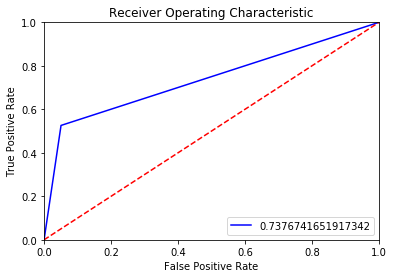

In [39]:
#ROC curve
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [40]:
#auc with probabilities value
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
#print(z)

0.9029189878834465


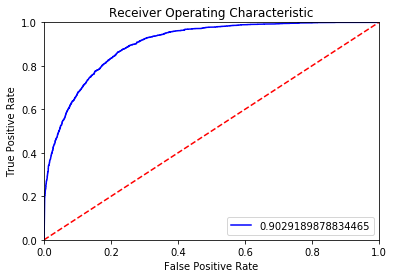

'\ntry and test the auc for multiple ambigues thresholds where errors are almost similar we compare\nthere auc value with overall auc value and we finalize upon that threshold which gives us an auc closer to overall auc'

In [41]:
#ROC curve with new fpr and tpr calculated by probabilities value
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
"""
try and test the auc for multiple ambigues thresholds where errors are almost similar we compare
there auc value with overall auc value and we finalize upon that threshold which gives us an auc closer to overall auc"""

In [42]:
#testing our model on new dataset
df_test = pd.read_csv(r'DataSets\adult_test.csv',
                       header=None,delimiter=' *, *',engine='python')

In [43]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
#we'll perform same process on this test dataset as we perform on training dataset  

In [44]:
#assigning column names 
df_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

In [45]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [46]:
df_test.shape

(16281, 15)

In [47]:
df_test=df_test.drop(["education","fnlwgt"],axis=1) 
df_test.shape

(16281, 13)

In [48]:
#checking the null values
df_test.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [49]:
df_test = df_test.replace(['?'],np.nan)  

In [50]:
df_test.isnull().sum()

age                 0
workclass         963
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [51]:
for value in ['workclass','occupation','native_country']:
    df_test[value].fillna(df_test[value].mode()[0],inplace=True)

In [52]:
df_test.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [53]:
#fetching out the categorical variables from dataset and creating list of that variables
#which we'll use in label encoding
colname1 =[]
for x in df_test.columns[:]:
    if df_test[x].dtype == 'object':
        colname1.append(x)
colname1

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [54]:
#df_test.workclass.unique()
adult_df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [55]:
for x in colname1:
    df_test[x] = le.fit_transform(df_test[x])

In [56]:
df_test.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,7,4,6,3,2,1,0,0,40,37,0
1,38,3,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,3,10,2,6,0,2,1,7688,0,40,37,1
4,18,3,10,4,9,3,4,0,0,0,30,37,0


In [57]:
df_test.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [58]:
#creating indepedant(x) and dependant(y) variables in forms of array
X1 = df_test.values[:,:-1]
Y1 = df_test.values[:,-1]
X1

array([[25,  3,  7, ...,  0, 40, 37],
       [38,  3,  9, ...,  0, 50, 37],
       [28,  1, 12, ...,  0, 40, 37],
       ...,
       [38,  3, 13, ...,  0, 50, 37],
       [44,  3, 13, ...,  0, 40, 37],
       [35,  4, 13, ...,  0, 60, 37]], dtype=int64)

In [59]:
#scaling the test dataset with the same object which we use to scale training dataset so that both the set will be scaled
# with same scaling
X1 = scaler.transform(X1)
print(X1)

[[-0.99570562 -0.08529633 -1.19745882 ... -0.21665953 -0.03542945
   0.09624323]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953  0.77446821
   0.09624323]
 [-0.77576787 -1.89169231  0.74603917 ... -0.21665953 -0.03542945
   0.09624323]
 ...
 [-0.04264203 -0.08529633  1.13473876 ... -0.21665953  0.77446821
   0.09624323]
 [ 0.39723348 -0.08529633  1.13473876 ... -0.21665953 -0.03542945
   0.09624323]
 [-0.26257978  0.81790166  1.13473876 ... -0.21665953  1.58436587
   0.09624323]]


In [60]:
Y1=Y1.astype(int)

In [61]:
Y_pred_test = classifier.predict(X1)
Y_pred1_test = (Y_pred_test > 0.5)
Y_pred_test

array([[0.0010227 ],
       [0.32660466],
       [0.27748674],
       ...,
       [0.6910743 ],
       [0.20999911],
       [0.6177708 ]], dtype=float32)

In [62]:
#Confusion matrix and Classification report with accuracy of model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y1,Y_pred1_test)
print(cfm)

print("Classification report : ")

print(classification_report(Y1,Y_pred1_test))

acc = accuracy_score(Y1,Y_pred1_test)
print("Accuracy of the model : ",acc)

[[11815   620]
 [ 1803  2043]]
Classification report : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12435
           1       0.77      0.53      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.74      0.77     16281
weighted avg       0.84      0.85      0.84     16281

Accuracy of the model :  0.8511762176770469
